In [494]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel("gabungan90.xlsx")

df.head()

,Unnamed: 0,Tweet_tokens_stemmed,Polarity,Sentiment
0,0,[],0.000000,neutral
1,1,"['kait', 'revisi', 'hap', 'kayak', 'cuma', 'is...",0.166667,positive
2,2,"['urus', 'basic', 'rakyat', 'tidak', 'becus', ...",0.000000,neutral
3,3,"['wkwkwkk', 'uasny', 'logika', 'nalar', 'hukum...",0.000000,neutral
4,4,"['fenomena', 'stempel', 'kadrun', 'pakai', 'ka...",0.000000,neutral


In [495]:
df.shape

(778, 4)

In [496]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            778 non-null    int64  
 1   Tweet_tokens_stemmed  778 non-null    object 
 2   Polarity              778 non-null    float64
 3   Sentiment             778 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 24.4+ KB


In [497]:
np.sum(df.isnull().any(axis=1))

0

In [498]:
df['Sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [499]:
df['Sentiment'].value_counts()

neutral     386
negative    199
positive    193
Name: Sentiment, dtype: int64

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

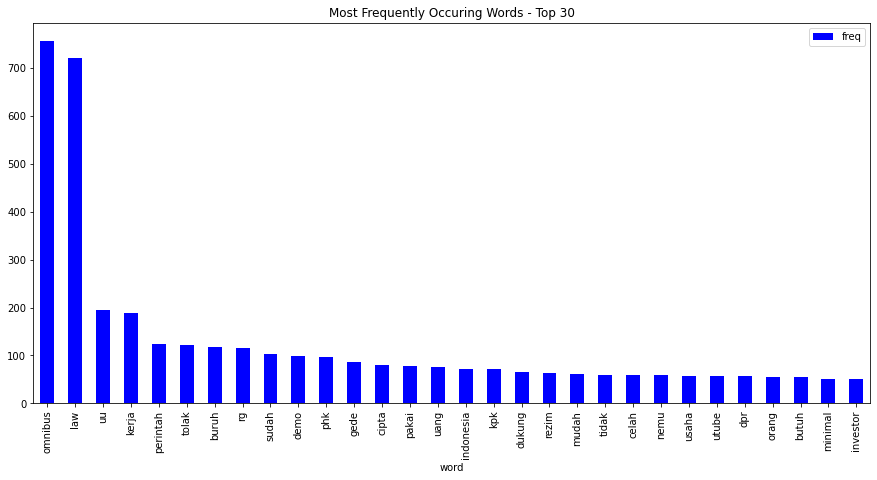

In [500]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.Tweet_tokens_stemmed)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

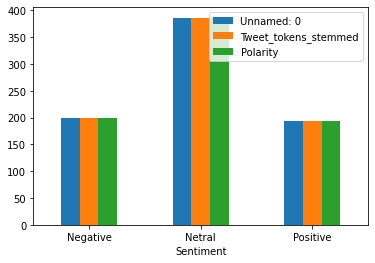

In [501]:
# Plotting the distribution for dataset.
ax = df.groupby('Sentiment').count().plot(kind='bar')
ax.set_xticklabels(['Negative','Netral','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['Tweet_tokens_stemmed']), list(df['Sentiment'])

In [502]:
data=df[['Tweet_tokens_stemmed','Sentiment']]
X=data.Tweet_tokens_stemmed
y=data.Sentiment

### classification

In [503]:
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [504]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [505]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  4754


In [506]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [507]:
from sklearn.metrics import confusion_matrix

clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

### Naive Bayes Classifier

In [508]:
#classifier dara
nb = MultinomialNB()
#nb = BernoulliNB()
nb.fit(X_train, y_train)
preds = nb.predict(X_test)
print (classification_report(y_test, preds))
print (confusion_matrix(y_test, preds))

print("Training Accuracy :", nb.score(X_test, y_test))

              precision    recall  f1-score   support

    negative       0.98      0.90      0.93        48
     neutral       0.92      0.94      0.93        71
    positive       0.92      0.97      0.95        37

    accuracy                           0.94       156
   macro avg       0.94      0.94      0.94       156
weighted avg       0.94      0.94      0.94       156

[[43  5  0]
 [ 1 67  3]
 [ 0  1 36]]
Training Accuracy : 0.9358974358974359


### Support Vector Machine

In [509]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
preds = SVCmodel.predict(X_test)
print (classification_report(y_test, preds))
print (confusion_matrix(y_test, preds))

print("Training Accuracy :", SVCmodel.score(X_test, y_test))

              precision    recall  f1-score   support

    negative       0.98      0.90      0.93        48
     neutral       0.92      0.96      0.94        71
    positive       0.95      0.97      0.96        37

    accuracy                           0.94       156
   macro avg       0.95      0.94      0.94       156
weighted avg       0.94      0.94      0.94       156

[[43  5  0]
 [ 1 68  2]
 [ 0  1 36]]
Training Accuracy : 0.9423076923076923


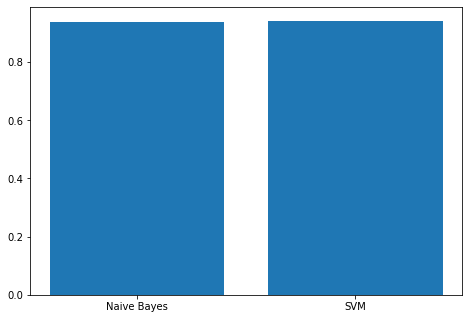

In [510]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
Name = ['Naive Bayes', 'SVM']
Value = [nb.score(X_test, y_test), SVCmodel.score(X_test, y_test)]
ax.bar(Name,Value)
plt.show()